In [1]:
path = '/home/hsun/PROMISE_12_RL/data/'

In [2]:
import cv2
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
case = []
for i in range(50):
    if i<=9:
        file_path = path + 'Case0' + str(i) + '.mhd'
        seg_path = path + 'Case0' + str(i) + '_segmentation.mhd'
    else:
        file_path = path + 'Case' + str(i) + '.mhd'
        seg_path = path + 'Case' + str(i) + '_segmentation.mhd'
    image = sitk.ReadImage(file_path)
    image = sitk.GetArrayFromImage(image)
    image = np.asarray(image)
    seg = sitk.ReadImage(seg_path)
    seg = sitk.GetArrayFromImage(seg)
    seg = np.asarray(seg)
    case.append(np.stack([image,seg]))

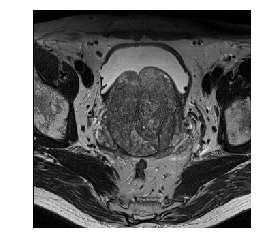

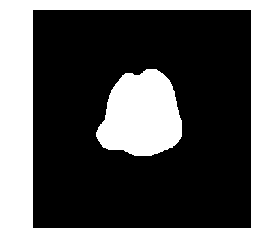

In [3]:
plt.imshow(case[23][0][16],cmap='gray')
plt.axis('off')
plt.show()
#cv2.imwrite('1.png',image)
plt.imshow(case[23][1][16],cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def crop(Case,lenth=256):
    case_cropped = []
    for i in range(len(Case)):
        lenth_case = Case[i].shape[2]
        if lenth_case>=lenth:#图像边长大于参数lenth
            lb = round(lenth_case/2)-round(lenth/2)
            ub = round(lenth_case/2)+round(lenth/2)
            case_cropped.append(Case[i][:,:,lb:ub,lb:ub])
    return case_cropped

In [5]:
case_cropped = crop(case)

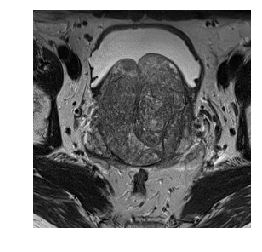

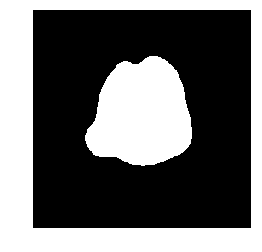

In [6]:
plt.imshow(case_cropped[23][0][16],cmap='gray')
plt.axis('off')
plt.show()
#cv2.imwrite('1.png',image)
plt.imshow(case_cropped[23][1][16],cmap='gray')
plt.axis('off')
plt.show()

In [7]:
img_set = []
seg_set = []
for i in range(len(case_cropped)):
    for j in range((case_cropped[i].shape[1])):
        img_set.append(case_cropped[i][0][j])
        seg_set.append(case_cropped[i][1][j])

In [8]:
img_set = np.asarray(img_set)
seg_set = np.asarray(seg_set)
print(img_set.shape)
print(seg_set.shape)

(1377, 256, 256)
(1377, 256, 256)


In [9]:
test_pic_num = 0
for i in range(45,50):
    test_pic_num+=case_cropped[i].shape[1]
print(test_pic_num)

120


In [14]:
img_set_train = img_set[:1377-120]
img_set_val = img_set[1377-120:]
seg_set_train = seg_set[:1377-120]
seg_set_val = seg_set[1377-120:]

In [15]:
np.save("img_train.npy",img_set_train)
np.save("img_val.npy",img_set_val)
np.save("seg_train.npy",seg_set_train)
np.save("seg_val.npy",seg_set_val)

In [12]:
img_set.shape

(1377, 256, 256)